# Regression from Scratch

#### Necessary Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data

In [2]:
data = pd.read_csv("kc_house_data.csv", dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420.0,101930,1,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760.0,101930.0
6,1321400060,20140627T000000,257500.0,3.0,2.25,1715.0,6819,2,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238.0,6819.0
7,2008000270,20150115T000000,291850.0,3.0,1.50,1060.0,9711,1,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650.0,9711.0
8,2414600126,20150415T000000,229500.0,3.0,1.00,1780.0,7470,1,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780.0,8113.0
9,3793500160,20150312T000000,323000.0,3.0,2.50,1890.0,6560,2,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390.0,7570.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  object 
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  float64
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  float64
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  object 
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  object 
 17  lat            21613 non-null  float64
 18  long  

In [4]:
data.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613,21613.000000,21613.000000,21613.000000,21613.000000
unique,21436,372,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70,NaN,NaN,NaN,NaN
top,0795000620,20140623T000000,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98103,NaN,NaN,NaN,NaN
freq,3,142,NaN,NaN,NaN,NaN,NaN,10680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602,NaN,NaN,NaN,NaN
mean,NaN,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,NaN,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,NaN,47.560053,-122.213896,1986.552492,12768.455652
std,NaN,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,NaN,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,NaN,0.138564,0.140828,685.391304,27304.179631
min,NaN,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,NaN,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,NaN,47.155900,-122.519000,399.000000,651.000000
25%,NaN,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,NaN,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,NaN,47.471000,-122.328000,1490.000000,5100.000000
50%,NaN,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,NaN,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,NaN,47.571800,-122.230000,1840.000000,7620.000000
75%,NaN,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,NaN,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,NaN,47.678000,-122.125000,2360.000000,10083.000000


Train/Test data (80% training and 20% testing)

In [5]:
train_data = pd.read_csv("kc_house_train_data.csv")
train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
test_data = pd.read_csv("kc_house_test_data.csv")
test_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,114101516,20140528T000000,310000.0,3,1.0,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
1,9297300055,20150124T000000,650000.0,4,3.0,2950,5000,2.0,0,3,3,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
2,1202000200,20141103T000000,233000.0,3,2.0,1710,4697,1.5,0,0,5,6,1710,0,1941,0,98002,47.3048,-122.218,1030,4705
3,8562750320,20141110T000000,580500.0,3,2.5,2320,3980,2.0,0,0,3,8,2320,0,2003,0,98027,47.5391,-122.070,2580,3980
4,7589200193,20141110T000000,535000.0,3,1.0,1090,3000,1.5,0,0,4,8,1090,0,1929,0,98117,47.6889,-122.375,1570,5080


## Simple Regression Model (Closed form solution)

$ numerator = (\Sigma (X*Y)) - (1/N)*((\Sigma X) * (\Sigma Y)) $

$ denominator = (\Sigma X^2) - (1/N)*((\Sigma X) * (\Sigma X)) $

OR

$ numerator = (mean \ of X * Y) - (mean \ of X)*(mean \ of Y) $

$ denominator = (mean \ of X^2) - (mean \ of X)*(mean \ of X) $

$ slope = numerator/denominator $

$ intercept = (mean \ of Y) - slope * (mean \ of X) $

In [0]:
def simple_linear_regression(input_feature, output):
    X = input_feature
    Y = output
    N = len(X)
    
    numerator = ((X*Y).sum()) - (1/N)*((X.sum()) * (Y.sum()))
    denominator = ((X**2).sum()) - (1/N)*((X.sum()) * (X.sum()))

    slope = numerator/denominator
    intercept = (Y.mean()) - slope * (X.mean())

    return (intercept, slope)

Testing the model

In [8]:
test_feature = np.array(range(5))
test_output  = np.array(1 + 1*test_feature)

(test_intercept, test_slope) =  simple_linear_regression(test_feature, test_output)
print(f"Intercept: {test_intercept}")
print(f"    Slope: {test_slope}")

Intercept: 1.0
    Slope: 1.0


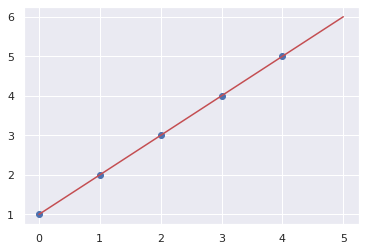

In [9]:
x = np.linspace(0,5,100)
plt.plot(test_feature, test_output, 'bo',
         x, test_slope*x + test_intercept,'r-');

#### Fitting the simple regression with **sqrt_living** and **price**

In [10]:
input_feature = train_data['sqft_living']
output = train_data['price']

sqft_intercept, sqft_slope = simple_linear_regression(input_feature, output)
print(f"Intercept: {sqft_intercept}")
print(f"    Slope: {sqft_slope}")

Intercept: -47116.07907289418
    Slope: 281.9588396303426


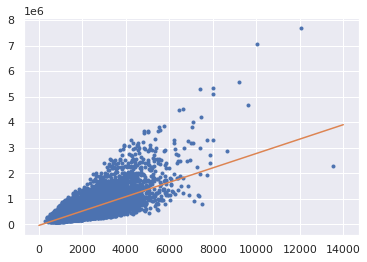

In [11]:
x = np.linspace(0,14000,100)
plt.plot(input_feature, output, '.',
         x, sqft_slope*x + sqft_intercept,'-');

#### Predicting Values

$ \hat{y} = intercept + slope * x $

In [0]:
def get_simple_regression_predictions(input_feature, intercept, slope):
    predicted_values = intercept + (slope * input_feature)
    return predicted_values

For a single house

In [13]:
my_house_sqft = 2650
estimated_price = get_simple_regression_predictions(my_house_sqft, sqft_intercept, sqft_slope)
print(f"The estimated price for a house with {my_house_sqft} squarefeet is {estimated_price}")

The estimated price for a house with 2650 squarefeet is 700074.8459475137


For all houses

In [14]:
input_feature = test_data['sqft_living']
output = test_data['price']

predicted_price = get_simple_regression_predictions(input_feature, sqft_intercept, sqft_slope)
print(predicted_price)

0       3.560851e+05
1       7.846625e+05
2       4.350335e+05
3       6.070284e+05
4       2.602191e+05
            ...     
4224    1.128652e+06
4225    6.577810e+05
4226    6.634202e+05
4227    6.042088e+05
4228    2.404819e+05
Name: sqft_living, Length: 4229, dtype: float64


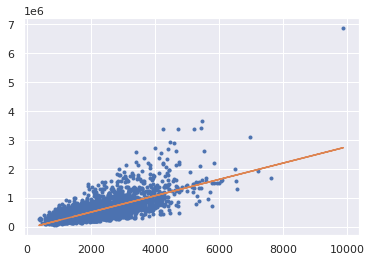

In [15]:
plt.plot(input_feature, output, '.',
         input_feature, predicted_price,'-');

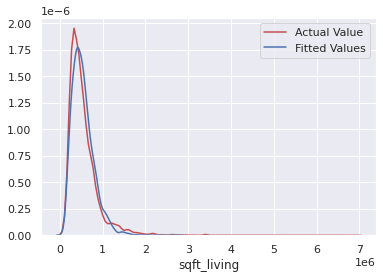

In [16]:
ax1 = sns.distplot(output, hist=False, color="r", label="Actual Value")
sns.distplot(predicted_price, hist=False, color="b", label="Fitted Values" , ax=ax1)

 #### Residual Sum of Squares (RSS)

The sum of all the differences between predicted values and actual values and then square the sum.


 $ RSS = \Sigma (y - \hat{y})^2 $


In [0]:
def get_residual_sum_of_squares(input_feature, output, intercept,slope):       
    predicted_values = get_simple_regression_predictions(input_feature, intercept, slope)   
    residuals = output - predicted_values
    RSS = (residuals**2).sum()
    return RSS

In [18]:
input_feature = train_data['sqft_living']
output = train_data['price']

rss_prices_on_sqft = get_residual_sum_of_squares(input_feature, output, sqft_intercept, sqft_slope)
print(f'The RSS of predicting Prices based on Square Feet is : {rss_prices_on_sqft}')

The RSS of predicting Prices based on Square Feet is : 1201918354177283.0


### Inverse Predictions

We know, 
$ \hat{y} = intercept + slope * x $

Therefore, 
$ x = (\hat{y} - intercept)/slope $

In [0]:
def inverse_regression_predictions(output, intercept, slope):
    estimated_feature = (output - intercept)/slope
    return estimated_feature

In [20]:
my_house_price = 800000
estimated_squarefeet = inverse_regression_predictions(my_house_price, sqft_intercept, sqft_slope)
print(f"The estimated squarefeet for a house worth {my_house_price} is {estimated_squarefeet}")

The estimated squarefeet for a house worth 800000 is 3004.3962451522766


## Multiple Regression Model (gradient decent)

Matrix Calculations.

In [0]:
def get_numpy_data(data, features, output):
    data['constant'] = 1
    features = ['constant'] + features
 
    features_df = data[features]     
    feature_matrix = features_df.to_numpy() #Convert into a numpy matrix
    
    output_array = data[output]
    output_array = output_array.to_numpy() #Convert into a numpy array

    return (feature_matrix, output_array)

$ \hat{y}_i = \Sigma \mathbf{w}_jh_j(\mathbf{x}_i) + \epsilon_i $

$ \epsilon_i $, the error term is ignored, as it is equally likely to be +ve or -ve.

**Martix Notations:**

$ \mathbf{y} = \mathbf{H}\mathbf{w} + \epsilon $

**RSS** = $ (\mathbf{y} - \mathbf{H}\mathbf{w})^T(\mathbf{y} - \mathbf{H}\mathbf{w}) $

Closed form solution: $ (\mathbf{H}^T \mathbf{H} )^{-1}\mathbf{H}^T\mathbf{y} $

In [0]:
def predict_output(feature_matrix, weights):
    predictions = np.dot(feature_matrix, weights)
    return predictions 

### Gradient Descent

$ w^{(t+1)} = w^{(t)} -
 \eta \nabla RSS(\mathbf{w}^{(t)}) $

where, $ \nabla RSS(\mathbf{w}) = -2\mathbf{H}^T(\mathbf{y} - \mathbf{H}\mathbf{w}) = - 2 * Errors * Features $ 

Therefore, $ w^{(t+1)} = w^{(t)} +2
 \eta \mathbf{H}^T(\mathbf{y} - \mathbf{H}\mathbf{w}) $

In [0]:
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    converged = False 
    weights = np.array(initial_weights) 

    while not converged:
        predictions = predict_output(feature_matrix, weights)
        errors = predictions - output
        gradient_sum_squares = 0 

        for i in range(len(weights)): 
            derivative = 2*np.dot(errors, feature_matrix[:, i])
            gradient_sum_squares += (derivative**2)
            weights[i] -= (step_size * derivative)
        
        gradient_magnitude = np.sqrt(gradient_sum_squares)

        if gradient_magnitude < tolerance:
            converged = True

    return weights

Testing with simple regression

In [24]:
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
initial_weights = np.array([-47000., 1.])
step_size = 7e-12
tolerance = 2.5e7
test_weight = regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, tolerance)
print(test_weight)

[-46999.88716555    281.91211918]


In [25]:
(test_simple_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)
test_predictions = predict_output(test_simple_feature_matrix, test_weight)
print(test_predictions)

[356134.443255   784640.86440132 435069.83662406 ... 663418.65315598
 604217.10812919 240550.47439317]


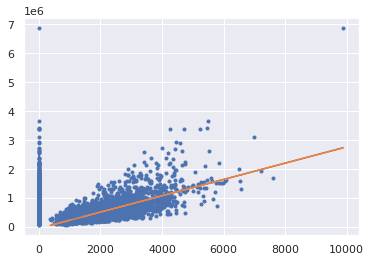

In [26]:
plt.plot(test_simple_feature_matrix, test_output, 'b.',
         test_simple_feature_matrix, test_predictions,'-');

### Multiple Regression

In [0]:
model_features = ['sqft_living', 'sqft_living15'] # sqft_living15 is the average squarefeet for the nearest 15 neighbors. 
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)

initial_weights = np.array([-100000., 1., 1.])
step_size = 4e-12
tolerance = 1e9

In [28]:
weight_2 = regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance)
print(weight_2)

[-9.99999688e+04  2.45072603e+02  6.52795267e+01]


In [29]:
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

test_predictions_2 = predict_output(test_feature_matrix, weight_2)
print(test_predictions_2)

[366651.41162949 762662.39850726 386312.09557541 ... 682087.39916306
 585579.27901327 216559.20391786]


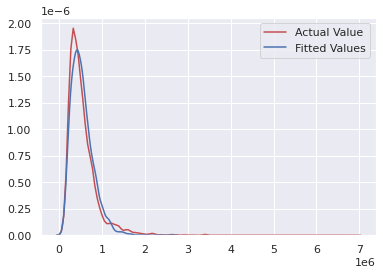

In [30]:
ax1 = sns.distplot(test_output, hist=False, color="r", label="Actual Value")
sns.distplot(test_predictions_2, hist=False, color="b", label="Fitted Values" , ax=ax1)

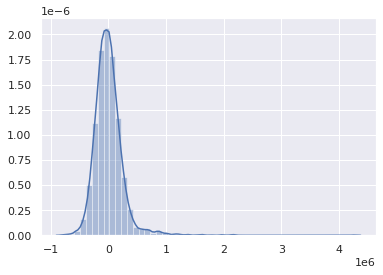

In [31]:
# Expected normal dist with peak at 0
residuals = test_output - test_predictions_2
sns.distplot(residuals)

In [0]:
def get_residual_sum_of_squares_from_output_predicted(output, predicted_values):          
    residuals = output - predicted_values
    RSS = (residuals**2).sum()
    return RSS

In [33]:
print(f"RSS:", get_residual_sum_of_squares_from_output_predicted(test_output, test_predictions_2))

RSS: 270263443629803.56


## Ridge Regression

**L2 Penalty** 

$ Total \ cost = RSS(\mathbf{w}) + \color{red}{ \lambda ||\mathbf{w}||_2^2} =  (\mathbf{y} - \mathbf{H}\mathbf{w})^T(\mathbf{y} - \mathbf{H}\mathbf{w}) + \color{red}{ \lambda \mathbf{w}^T\mathbf{w}}  $

In [0]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    # If feature_is_constant is True, derivative is twice the dot product of errors and feature
    if feature_is_constant == True:
        derivative = 2 * np.dot(errors, feature)
    # Otherwise, derivative is twice the dot product plus 2*l2_penalty*weight
    else:
        derivative = 2 * np.dot(errors, feature) + 2*(l2_penalty*weight)
    return derivative

In [0]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = np.array(initial_weights)     
    
    while max_iterations > 0:       
        predictions = predict_output(feature_matrix, weights)
        errors = predictions - output
        for i in range(len(weights)): 
          
            if i == 0:
                feature_is_constant = True
            else:
                feature_is_constant = False
            derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, feature_is_constant)
           
            weights[i] = weights[i] - (step_size * derivative)
        max_iterations -= 1            
    return weights

#### Fitting Ridge Regression

In [0]:
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

In [0]:
initial_weights = np.array([0., 0.])
step_size = 1e-12
max_iterations = 1000

In [38]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, 
                                                             initial_weights, step_size, 
                                                             0.0, max_iterations)
print(simple_weights_0_penalty)

[-1.63113515e-01  2.63024369e+02]


In [39]:
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, 
                                                             initial_weights, step_size, 
                                                             1e11, max_iterations)
print(simple_weights_high_penalty)

[  9.76730382 124.57217567]


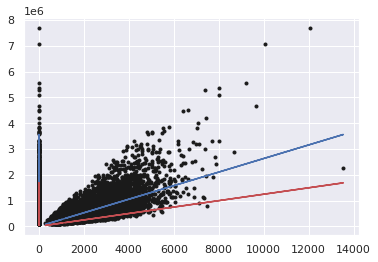

In [40]:
plt.plot(simple_feature_matrix,output,'k.',
         simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
         simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-');

## Normalization

$ h_j(\mathbf{x}_k) = \dfrac{h_j(\mathbf{x}_k)}{\sqrt{\sum h_j(\mathbf{x}_i)^2}} $

In [0]:
def normalize_features(feature_matrix):
    norms = np.linalg.norm(feature_matrix, axis=0)
    normalized_features = feature_matrix/norms
    return (normalized_features, norms)

Testing

In [42]:
features, norms = normalize_features(np.array([[3.,6.,9.],[4.,8.,12.]]))
print(f"Data:\n {np.array([[3.,6.,9.],[4.,8.,12.]])} \n Normalized:\n {(features)}")
print(f"Norms: {norms}")

Data:
 [[ 3.  6.  9.]
 [ 4.  8. 12.]] 
 Normalized:
 [[0.6 0.6 0.6]
 [0.8 0.8 0.8]]
Norms: [ 5. 10. 15.]


## Lasso Regression

**L1 Penalty**

$ Total \ cost = RSS(\mathbf{w}) + \color{red}{ \lambda ||\mathbf{w}||_1} $

In [0]:
def lasso_coordinate_descent_step(i, feature_matrix, output, weights, l1_penalty):
    prediction = predict_output(feature_matrix, weights)
    ro_i = (feature_matrix[:,i] * (output - prediction + (weights[i] * feature_matrix[:,i]))).sum()

    if i == 0: # intercept, then do not regularize
        new_weight_i = ro_i 
    elif ro_i < -l1_penalty/2.:
        new_weight_i = (ro_i + l1_penalty/2.)
    elif ro_i > l1_penalty/2.:
        new_weight_i = (ro_i - l1_penalty/2.)
    else:
        new_weight_i = 0.
    
    return new_weight_i

Testing

In [44]:
print( lasso_coordinate_descent_step(1, np.array([[3./np.sqrt(13),1./np.sqrt(10)],[2./np.sqrt(13),3./np.sqrt(10)]]), 
                                   np.array([1., 1.]), np.array([1., 4.]), 0.1))

0.4255588466910251


In [0]:
def lasso_cyclical_coordinate_descent(feature_matrix, output, initial_weights, l1_penalty, tolerance):
    D = feature_matrix.shape[1]
    weights = np.array(initial_weights)
    change = np.array(initial_weights) * 0.0
    converged = False

    while not converged:
        for idx in range(D):

            # new weight for feature
            new_weight = lasso_coordinate_descent_step(idx, feature_matrix,
                                                       output, weights,
                                                       l1_penalty)
            # compute change in weight for feature
            change[idx] = np.abs(new_weight - weights[idx])

            # assign new weight
            weights[idx] = new_weight

        # maximum change in weight, after all changes have been computed
        max_change = max(change)

        if max_change < tolerance:
            converged = True
    return weights

#### Fitting Lasso Regression

In [0]:
simple_features = ['sqft_living', 'bedrooms']
my_output = 'price'
initial_weights = np.zeros(3)
l1_penalty = 1e4
tolerance = 1.0

In [0]:
(simple_feature_matrix, output) = get_numpy_data(data, simple_features, my_output)
(normalized_simple_feature_matrix, simple_norms) = normalize_features(simple_feature_matrix) # normalize features

In [48]:
weights = lasso_cyclical_coordinate_descent(normalized_simple_feature_matrix, output,
                                            initial_weights, l1_penalty, tolerance)
print (weights)

[ 1.16210167e+07  1.04853516e+08 -2.91905467e+07]


In [49]:
prediction =  predict_output(normalized_simple_feature_matrix, weights)
RSS = get_residual_sum_of_squares_from_output_predicted(output, prediction)
print(RSS)

1436642141088566.0


#### Lasso with more features

In [0]:
all_features = ['bedrooms',
                'bathrooms',
                'sqft_living',
                'sqft_lot',
                'floors',
                'waterfront', 
                'view', 
                'condition', 
                'grade',
                'sqft_above',
                'sqft_basement',
                'yr_built', 
                'yr_renovated']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, all_features, my_output)
normalized_feature_matrix, norms = normalize_features(feature_matrix)

In [0]:
initial_weights = np.zeros(len(all_features) + 1)
l1_penalty = 1e4
tolerance = 1.0

In [52]:
weights1e4 = lasso_cyclical_coordinate_descent(normalized_feature_matrix, output,
                                               initial_weights, l1_penalty, tolerance)
print(weights1e4)

[ 7.87859491e+08 -1.96611439e+07  1.28893367e+07  5.20015124e+07
 -1.34448346e+06  4.40613056e+06  6.85843473e+06  4.53587116e+06
  8.66423048e+06  1.28374342e+08  0.00000000e+00  3.64776371e+05
 -8.98872855e+08  6.49411472e+05]


In [53]:
# print(list(zip(all_features, weights1e4)))
coef_df = pd.DataFrame(zip(all_features, weights1e4), columns=("Features", "Weights"))
coef_df[coef_df["Weights"] != 0]

,Features,Weights
0,bedrooms,7.878595e+08
1,bathrooms,-1.966114e+07
2,sqft_living,1.288934e+07
3,sqft_lot,5.200151e+07
4,floors,-1.344483e+06
5,waterfront,4.406131e+06
6,view,6.858435e+06
7,condition,4.535871e+06
8,grade,8.664230e+06
9,sqft_above,1.283743e+08


Normalizing weights to directly apply on data

In [0]:
normalized_weights1e4 = weights1e4 / norms

In [55]:
(test_feature_matrix, test_output) = get_numpy_data(test_data, all_features, 'price')
prediction =  predict_output(test_feature_matrix, normalized_weights1e4)
RSS = get_residual_sum_of_squares_from_output_predicted(test_output, prediction)
print('RSS for model with weights1e4 = ', RSS)

RSS for model with weights1e4 =  194415789314446.75


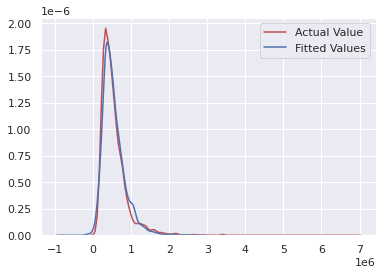

In [56]:
ax1 = sns.distplot(test_output, hist=False, color="r", label="Actual Value")
sns.distplot(prediction, hist=False, color="b", label="Fitted Values" , ax=ax1)

## K-nearest Neighbors Regression

Predicted value: $ \ \hat{y} $ = $ k \ $  closest  $ \ y_i $ 

In **1D**, just Euclidean distance:    $  \ distance(x_j,x_q) = |x_j-x_q| $

In [0]:
feature_list = ['bedrooms',  
                'bathrooms',  
                'sqft_living',  
                'sqft_lot',  
                'floors',
                'waterfront',  
                'view',  
                'condition',  
                'grade',  
                'sqft_above',  
                'sqft_basement',
                'yr_built',  
                'yr_renovated',  
                'lat',  
                'long',  
                'sqft_living15',  
                'sqft_lot15']
features_train, output_train = get_numpy_data(train_data, feature_list, 'price')
features_test, output_test = get_numpy_data(test_data, feature_list, 'price')
#we assume validation_data = test_data
validation_data = test_data
features_valid, output_valid = get_numpy_data(validation_data, feature_list, 'price')

Normalize

In [0]:
features_train, norms = normalize_features(features_train)
features_test = features_test / norms
features_valid = features_valid / norms

####  1-nearest neighbor regression

In [0]:
def compute_distances(train_matrix, query_vector):
    diff = train_matrix - query_vector
    distances = np.sqrt(np.sum(diff**2, axis=1))
    return distances

Test for 3rd value of test_data

In [60]:
third_house_distance = compute_distances(features_train, features_test[2])
idx = third_house_distance.argsort()[0]
min_distance = min(third_house_distance)
print(idx , min_distance)

15198 0.0010062800933970273


In [61]:
print("Predict Price:", output_train[idx])
print("Actual Price:", output_test[2])

Predict Price: 234000.0
Actual Price: 233000.0


#### k-nearest neighbor regression

In [0]:
def compute_k_nearest_neighbors(k, features_matrix, feature_vector):
    distances = compute_distances(features_matrix, feature_vector)
    return np.argsort(distances, axis = 0)[:k]

In [63]:
k_nearest_neighbors = compute_k_nearest_neighbors(4, features_train, features_test[2])
print(k_nearest_neighbors)

[15198  7004  7994 14877]


In [64]:
print("Predict Price (avg of all the values):", output_train[k_nearest_neighbors].mean())
print("Actual Price:", output_test[2])

Predict Price (avg of all the values): 304125.0
Actual Price: 233000.0


Single function

In [0]:
def compute_distances_k_avg(k, features_matrix, output_values, feature_vector):
    k_neigbors = compute_k_nearest_neighbors(k, features_matrix, feature_vector)
    avg_value = np.mean(output_values[k_neigbors])
    return avg_value

In [66]:
print(compute_distances_k_avg(4, features_train, output_train, features_test[2]))

304125.0


To compute multiple values

In [0]:
def compute_distances_k_all(k, features_matrix, output_values, feature_vector):
    num_of_rows = feature_vector.shape[0]
    predicted_values = []
    for i in range(num_of_rows):
        avg_value = compute_distances_k_avg(k, features_train, output_train, features_test[i])
        predicted_values.append(avg_value)
    return predicted_values

#### Choosing the best value of k using a validation set

Let us write a funtion to find the best value of k in a given range by finding minimun RSS value

In [0]:
#k 1-16
rss_all = []
for k in range(1,16):    
    predict_value = compute_distances_k_all(k, features_train, output_train, features_valid)
    rss = get_residual_sum_of_squares_from_output_predicted(output_valid, predict_value)
    rss_all.append(rss)

In [69]:
print(rss_all)
print(f"k = {rss_all.index(min(rss_all))}  RSS = {min(rss_all)}",)

[282101002919057.0, 220618309271553.5, 201841847980446.66, 189310188181744.75, 190110780118806.34, 187954642136394.5, 185986285679529.88, 185116598147126.0, 185737291238478.3, 188082669926013.25, 186999130202952.12, 187968428312453.94, 189484473832326.06, 190963356274700.28, 192045535078109.88]
k = 7  RSS = 185116598147126.0


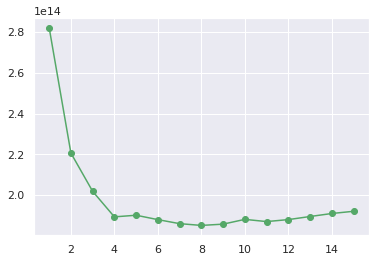

In [70]:
k_values = range(1, 16)
plt.plot(k_values, rss_all, 'go-')